In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2 retail_dataset.csv")
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [3]:
itemset = set(df.values.flatten())
itemset

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine',
 nan}

In [6]:
#for each row, check if that element is present or not
encoded_values = []
for idx,row in df.iterrows():
    rowset = set(row)
    labels = {}
    
    uncommon = list(itemset - rowset)
    common = list(itemset.intersection(rowset))
    
    for uc in uncommon:
        labels[uc] = 0
    
    for com in common:
        labels[com] = 1
        
    encoded_values.append(labels)
encoded_values[0]
tf_df = pd.DataFrame(encoded_values)
tf_df

,NaN,Bagel,Milk,Cheese,Eggs,Wine,Diaper,Pencil,Bread,Meat
0,0,0,0,1,1,1,1,1,1,1
1,0,0,1,1,0,1,1,1,1,1
2,1,0,1,1,1,1,0,0,0,1
3,1,0,1,1,1,1,0,0,0,1
4,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,1,1,0,0,0,1,0
311,1,0,1,0,0,0,0,1,0,1
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,1,0,0,0,0,0,1


In [8]:
freq_items = apriori(tf_df, min_support=0.2, use_colnames=True)

In [9]:
freq_items

,support,itemsets
0,0.869841,(nan)
1,0.425397,(Bagel)
2,0.501587,(Milk)
3,0.501587,(Cheese)
4,0.438095,(Eggs)
5,0.438095,(Wine)
6,0.406349,(Diaper)
7,0.361905,(Pencil)
8,0.504762,(Bread)
9,0.476190,(Meat)


In [10]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902
1,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141
2,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855
3,(Eggs),(nan),0.438095,0.869841,0.336508,0.768116,0.883053,-0.044565,0.561310
4,(Wine),(nan),0.438095,0.869841,0.317460,0.724638,0.833069,-0.063613,0.472682
5,(Diaper),(nan),0.406349,0.869841,0.317460,0.781250,0.898152,-0.035999,0.595011
6,(Pencil),(nan),0.361905,0.869841,0.266667,0.736842,0.847100,-0.048133,0.494603
7,(Bread),(nan),0.504762,0.869841,0.396825,0.786164,0.903801,-0.042237,0.608683
8,(Meat),(nan),0.476190,0.869841,0.368254,0.773333,0.889051,-0.045956,0.574230
9,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650


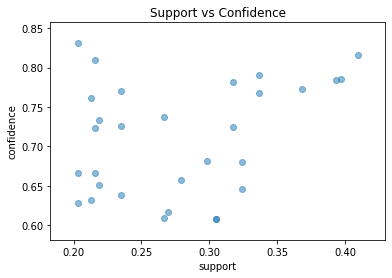

In [11]:
# Rules vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

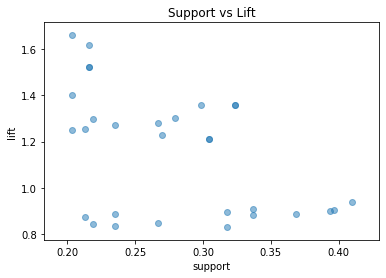

In [12]:
# Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
# Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))